# 방위각 적분(Azimuth integral)
- Fourier Transform
- Magnitude Spectrum
- Azimuth integral

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad

(3994, 3994, 3)


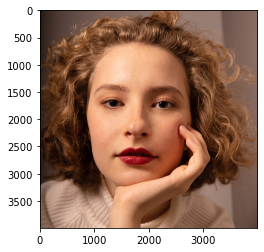

In [3]:
img = cv2.imread('human1.jpg')
plt.imshow(img[...,::-1])
print(img.shape)

## Fourier Transform
https://opencv-python.readthedocs.io/en/latest/doc/23.imageFourierTransform/imageFourierTransform.html
- 시간 도메인(X축)에서 표현된 신호(일반적인 파형 도표)를 주파수 도메인으로 변환.
- 시간축이 제거되어 대상의 전체적인 특징을 파악할 수 있음.
- 이미지에 적용이 되어 중심이 저주파 영역, 주변이 고주파 영역을 나타냄.
- 푸리에 변환을 하여 저주파 또는 고주파를 제거하고 다시 역으로 이미지로 변환 함으로써 이미지가공을 할 수 있음.
    - ex; 푸리에 변환 후 중심의 저주파를 제거하고 다시 Image로 전환 하면 이미지의 경계선만 남게 됨.
    - 푸리에 변환 후 주변의 고주파를 제거하면 모아레 패턴(휴대폰으로 모니터를 찍었을 때 나타나는 현상)을 제거할 수 있음.(모니터의 고주파를 제거함.)

(3994, 3994)


(Text(0.5, 1.0, 'Spectrum'), ([], []), ([], []))

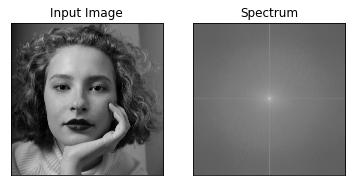

In [3]:
img = cv2.imread('human1.jpg')
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = cv2.resize(img, dsize=(400, 400), interpolation = cv2.INTER_AREA)
print(img.shape)

"""
# Fourier Transform을 적용.
 적용을 하면 0,0, 즉 화면 좌측상단점이 중심이고, 거기에 저주파가 모여 있음.
 분석을 용이하게 하기 위해 0,0을 이미지의 중심으로 이동 시키고 Log Scaling을 하여 분석이 
 용이한 결과값으로 변환
 
 fft(a[, n, axis, norm]): Compute the one-dimensional discrete Fourier Transform.
 fft2(a[, s, axes, norm]): Compute the 2-dimensional discrete Fourier Transform.
"""

f = np.fft.fft2(img)        # 이미지에 푸리에 변환 적용
fshift = np.fft.fftshift(f) # 분석을 용이하게 하기 위해 주파수가 0인 부분을 중앙에 위치시킴. 중앙에 저주파가 모이게 됨.
    
magnitude_spectrum = 20*np.log(np.abs(fshift)) #spectrum 구하는 수학식.


plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Spectrum'), plt.xticks([]), plt.yticks([])


![image](https://user-images.githubusercontent.com/46768752/124647782-60e3b900-ded1-11eb-81c9-15c85fdc615b.png)

In [4]:
from numpy.core import asarray
import functools
from numpy.core import overrides

array_function_dispatch = functools.partial(
    overrides.array_function_dispatch, module='numpy.fft')


def _fftn_dispatcher(a, s=None, axes=None, norm=None):
    return (a,)


def _cook_nd_args(a, s=None, axes=None, invreal=0):
    if s is None:
        shapeless = 1
        if axes is None:
            s = list(a.shape)
        else:
            s = take(a.shape, axes)
    else:
        shapeless = 0
    s = list(s)
    if axes is None:
        axes = list(range(-len(s), 0))
    if len(s) != len(axes):
        raise ValueError("Shape and axes have different lengths.")
    if invreal and shapeless:
        s[-1] = (a.shape[axes[-1]] - 1) * 2
    return s, axes



def _raw_fftnd(a, s=None, axes=None, function=np.fft.fft, norm=None):
    a = asarray(a)
    s, axes = _cook_nd_args(a, s, axes)
    itl = list(range(len(axes)))
    itl.reverse()
    for ii in itl:
        a = function(a, n=s[ii], axis=axes[ii], norm=norm)
    return a



@array_function_dispatch(_fftn_dispatcher)
def fft2(a, s=None, axes=(-2, -1), norm=None):
    return _raw_fftnd(a, s, axes, fft, norm)


'''
Parameters
a: array_like
Input array, can be complex

s: sequence of ints, optional
Shape (length of each transformed axis) of the output (s[0] refers to axis 0, s[1] to axis 1, etc.). 
This corresponds to n for fft(x, n). Along each axis, if the given shape is smaller than 
that of the input, the input is cropped. If it is larger, the input is padded with zeros. 
if s is not given, the shape of the input along the axes specified by axes is used.

axes: sequence of ints, optional
Axes over which to compute the FFT. If not given, the last two axes are used. 
A repeated index in axes means the transform over that axis is performed multiple times. 
A one-element sequence means that a one-dimensional FFT is performed.

norm: {“backward”, “ortho”, “forward”}, optional
New in version 1.10.0. Normalization mode (see numpy.fft). Default is “backward”. 
Indicates which direction of the forward/backward pair of transforms is scaled and 
with what normalization factor.

'''

'\nParameters\na: array_like\nInput array, can be complex\n\ns: sequence of ints, optional\nShape (length of each transformed axis) of the output (s[0] refers to axis 0, s[1] to axis 1, etc.). \nThis corresponds to n for fft(x, n). Along each axis, if the given shape is smaller than \nthat of the input, the input is cropped. If it is larger, the input is padded with zeros. \nif s is not given, the shape of the input along the axes specified by axes is used.\n\naxes: sequence of ints, optional\nAxes over which to compute the FFT. If not given, the last two axes are used. \nA repeated index in axes means the transform over that axis is performed multiple times. \nA one-element sequence means that a one-dimensional FFT is performed.\n\nnorm: {“backward”, “ortho”, “forward”}, optional\nNew in version 1.10.0. Normalization mode (see numpy.fft). Default is “backward”. \nIndicates which direction of the forward/backward pair of transforms is scaled and \nwith what normalization factor.\n\n'

## 방위각 적분

![image](https://user-images.githubusercontent.com/46768752/124463407-cea6bc80-ddcd-11eb-8e73-d347605e5e97.png)

$w_k$ : 반지름

$\phi$ : 각도 

$F(I)$: FFT변환을 거친 magnitude_spectrum


### Method1: from scipy.integrate import quad

In [5]:
ai = []
middle_loc = magnitude_spectrum.shape[0] // 2

for w_k in range(middle_loc): 
    ai.append(quad(lambda x: magnitude_spectrum[middle_loc+int(w_k*np.cos(x)), middle_loc+int(w_k*np.sin(x))], 0, 2*np.pi))

c:\programdata\anaconda3\envs\pythonproject\lib\site-packages\ipykernel_launcher.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """


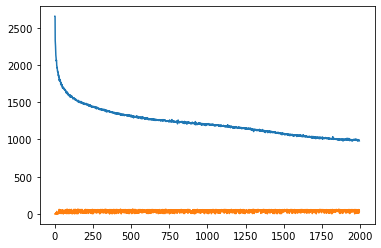

In [6]:
plt.plot(ai)

### Method2: average

In [7]:
ai = []  # 방위각 적분값 반지름별로 저장
middle_loc = magnitude_spectrum.shape[0] // 2  # magnitude_spectrum의 중점, 최대 반지름 길이

for w_k in range(middle_loc):
    val = []
    for x in range(round(2*np.pi)):
        val.append(magnitude_spectrum[middle_loc+int(w_k*np.cos(x)), middle_loc+int(w_k*np.sin(x))])
        
    ai.append(sum(val)/len(val)) # 평균

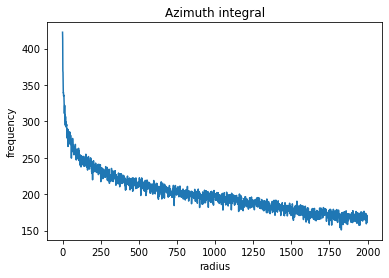

In [8]:
plt.plot(ai)
plt.xlabel('radius')
plt.ylabel('frequency')
plt.title('Azimuth integral')
plt.show()

### Method3: radialProfile.azimuthalAverage

In [9]:
import numpy as np

def azimuthalAverage(image, center=None):
    """
    Calculate the azimuthally averaged radial profile.
    image - The 2D image
    center - The [x,y] pixel coordinates used as the center. The default is 
             None, which then uses the center of the image (including 
             fracitonal pixels).
    
    """
    # Calculate the indices from the image
    y, x = np.indices(image.shape)

    if not center:
        center = np.array([(x.max()-x.min())/2.0, (y.max()-y.min())/2.0])

    r = np.hypot(x - center[0], y - center[1])

    # Get sorted radii
    ind = np.argsort(r.flat)
    r_sorted = r.flat[ind]
    i_sorted = image.flat[ind]

    # Get the integer part of the radii (bin size = 1)
    r_int = r_sorted.astype(int)

    # Find all pixels that fall within each radial bin.
    deltar = r_int[1:] - r_int[:-1]  # Assumes all radii represented
    rind = np.where(deltar)[0]       # location of changed radius
    nr = rind[1:] - rind[:-1]        # number of radius bin
    
    # Cumulative sum to figure out sums for each radius bin
    csim = np.cumsum(i_sorted, dtype=float)
    tbin = csim[rind[1:]] - csim[rind[:-1]]

    radial_prof = tbin / nr

    return radial_prof

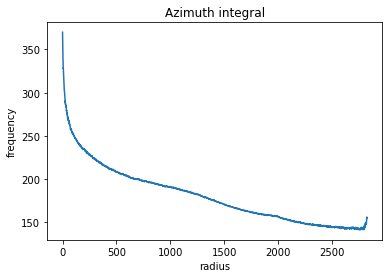

In [10]:
psd1D = azimuthalAverage(magnitude_spectrum)

plt.plot(psd1D)
plt.xlabel('radius')
plt.ylabel('frequency')
plt.title('Azimuth integral')
plt.show()